In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf

In [4]:
data = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [8]:
data["Quarters"] = 0
data["Year"] = 0
for i in range(42):
    p = data["Quarter"][i]
    data["Quarters"][i] = p[:2]
    data["Year"][i] = p[3:5]
    
data

C:\Users\marang\AppData\Local\Temp\ipykernel_44536\1166793585.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Quarters"][i] = p[:2]
C:\Users\marang\AppData\Local\Temp\ipykernel_44536\1166793585.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Year"][i] = p[3:5]


,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87
5,Q2_87,2104.411995,Q2,87
6,Q3_87,2014.362999,Q3,87
7,Q4_87,1991.746998,Q4,87
8,Q1_88,1869.049999,Q1,88
9,Q2_88,2313.631996,Q2,88


In [9]:
Quarters_dummies = pd.DataFrame(pd.get_dummies(data["Quarters"]))
data = pd.concat([data,Quarters_dummies], axis=1)
data

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0
5,Q2_87,2104.411995,Q2,87,0,1,0,0
6,Q3_87,2014.362999,Q3,87,0,0,1,0
7,Q4_87,1991.746998,Q4,87,0,0,0,1
8,Q1_88,1869.049999,Q1,88,1,0,0,0
9,Q2_88,2313.631996,Q2,88,0,1,0,0


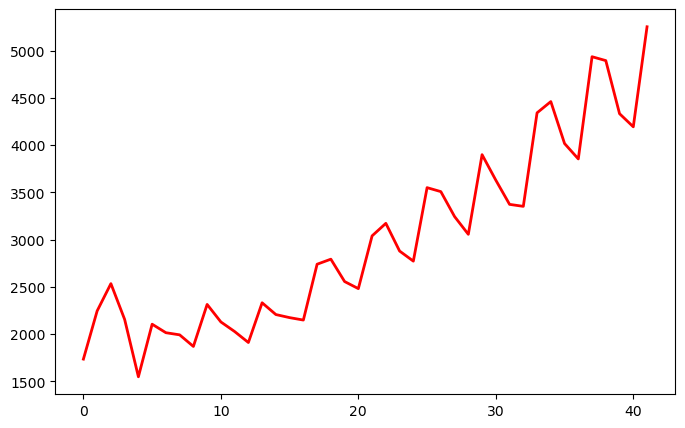

In [10]:
plt.figure(figsize=(8,5))
plt.plot(data["Sales"], color="red", linewidth=2)

<AxesSubplot:>

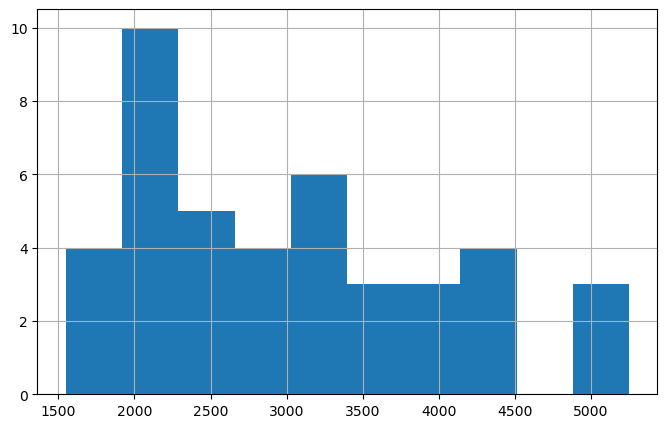

In [11]:
data["Sales"].hist(figsize=(8,5))

<AxesSubplot:ylabel='Density'>

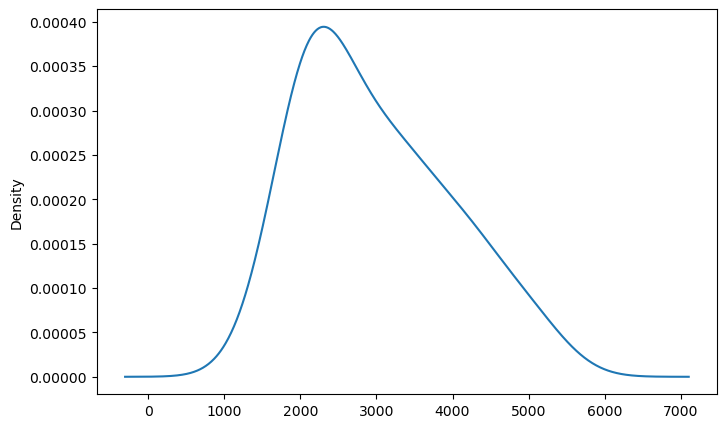

In [14]:
data["Sales"].plot(kind="kde",figsize=(8,5))

<AxesSubplot:xlabel='Quarters', ylabel='Sales'>

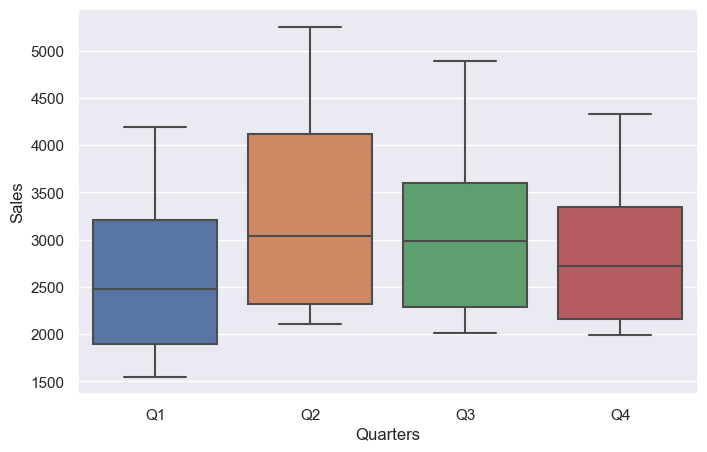

In [17]:
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x="Quarters",y="Sales",data=data)

In [19]:
train = data.head(32)
test = data.tail(10)

## Moving Average Method

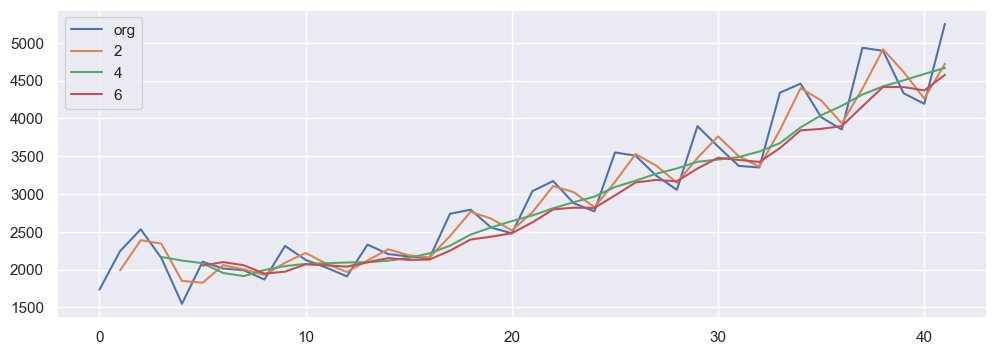

In [20]:
plt.figure(figsize=(12,4))
data.Sales.plot(label="org")
for i in range(2,8,2):
    data["Sales"].rolling(i).mean().plot(label=str(i))
    plt.legend(loc="best")

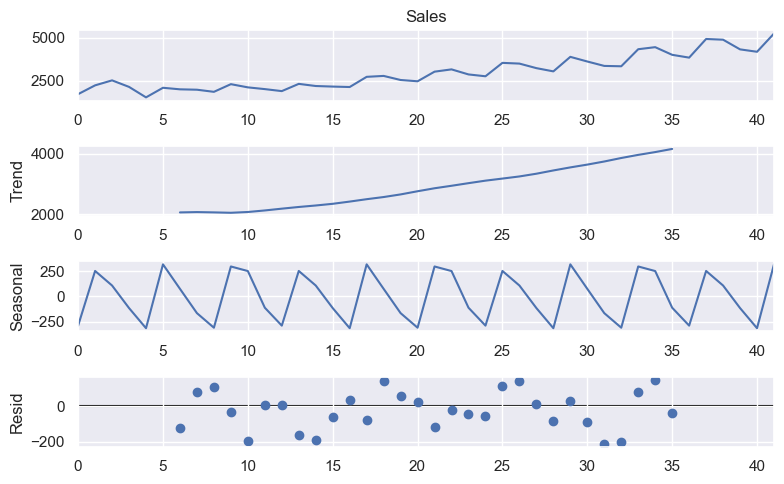

In [22]:
decompose_ts_add = seasonal_decompose(data.Sales, period=12)
decompose_ts_add.plot()
plt.show()

In [23]:
def RMSE(org, pred):
    rmse = np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

# Data Driven Forecasting Methods

## Simple Exponential Method

In [24]:
ses_model = SimpleExpSmoothing(train["Sales"]).fit()
pred_ses = ses_model.predict(start = test.index[0], end = test.index[-1])
rmse_ses_model = RMSE(test.Sales, pred_ses)
rmse_ses_model

1034.9359056453961

## Holt Method

In [26]:
hw_model = Holt(train["Sales"]).fit()
pred_hw = hw_model.predict(start = test.index[0], end = test.index[-1])
rmse_hw_model = RMSE(test.Sales, pred_hw)
rmse_hw_model

941.6367810616845

In [27]:
hwe_model_add_add = ExponentialSmoothing(train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
rmse_hwe_add_add_model = RMSE(test.Sales, pred_hwe_add_add)
rmse_hwe_add_add_model

633.4394050169811

In [28]:
hwe_model_mul_add = ExponentialSmoothing(train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
rmse_hwe_model_mul_add_model = RMSE(test.Sales, pred_hwe_mul_add)
rmse_hwe_model_mul_add_model

568.1679856842486

# Model Based Forecasting Methods

In [30]:
data['t'] = np.arange(1,43)
data['t_sq'] = data['t']*data['t']
data['log_sales'] = np.log(data["Sales"])
data

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_sq,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,87,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,87,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,87,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,88,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,88,0,1,0,0,10,100,7.746574


In [31]:
train = data.head(32)
test = data.tail(10)

## Linear Model

In [35]:
linear_model = smf.ols("Sales~t",data=train).fit()
pred_lin = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_lin_model = RMSE(test["Sales"], pred_lin)
rmse_lin_model

752.9233932767132

## Exponential Method

In [38]:
exp = smf.ols("log_sales~t",data=train).fit()
pred_exp = pd.Series(exp.predict(pd.DataFrame(test['t'])))
rmse_exp_model = RMSE(test["Sales"],np.exp(pred_exp))
rmse_exp_model

590.3316432076668

## Quadratic Method

In [41]:
quad = smf.ols('Sales~t+t_sq',data=train).fit()
pred_quad = pd.Series(quad.predict(test[["t","t_sq"]]))
rmse_quad = RMSE(test["Sales"],pred_quad)
rmse_quad

457.7357355407399

## Addictive Seasonality Model

In [42]:
add_sea = smf.ols("Sales~Q1+Q2+Q3+Q4",data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[["Q1","Q2","Q3","Q4"]]))
rmse_add_sea = RMSE(test["Sales"],pred_add_sea)
rmse_add_sea

1850.466546185835

## Addictive Seasonality Quadratic Model

In [48]:
add_sea_quad = smf.ols("Sales~t+t_sq+Q1+Q2+Q3+Q4",data=train).fit()
prd_add_sea_quad = pd.Series(add_sea_quad.predict(test[["Q1","Q2","Q3","Q4","t","t_sq"]]))
rmse_add_sea_quad = RMSE(test["Sales"],prd_add_sea_quad)
rmse_add_sea_quad

277.3510771128502

## Multiplicative Seasonal Model

In [49]:
mul_sea = smf.ols('log_sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_mul_sea = pd.Series(mul_sea.predict(test[["Q1","Q2","Q3","Q4"]]))
rmse_mul_sea = RMSE(test["Sales"],np.exp(pred_mul_sea))
rmse_mul_sea

1908.250394836114

## Multiplicative Addictive Seasonality Model

In [50]:
mul_add_sea = smf.ols("log_sales~t+Q1+Q2+Q3+Q4",data=train).fit()
pred_mul_add_sea = pd.Series(mul_add_sea.predict(test))
rmse_mul_add_sea = RMSE(test["Sales"],np.exp(pred_mul_add_sea))
rmse_mul_add_sea

448.86781826920344

#### As Addictive Seasonality Quadratic model has the least rmse, we will build a model using it

In [51]:
final = smf.ols('Sales~t+t_sq+Q1+Q2+Q3+Q4',data=data).fit()
pred = pd.Series(final.predict(data[['Q1','Q2','Q3','Q4','t','t_sq']]))
rmse_final = RMSE(data['Sales'],pred)
rmse_final

159.05522576522478

In [52]:
pred_df = pd.DataFrame({'Actual':data.Sales,'Predicted':pred})
pred_df

,Actual,Predicted
0,1734.827000,1626.592727
1,2244.960999,2268.402339
2,2533.804993,2189.685821
3,2154.962997,1867.242917
4,1547.818996,1658.311143
5,2104.411995,2314.185178
6,2014.362999,2249.533083
7,1991.746998,1941.154603
8,1869.049999,1746.287252
9,2313.631996,2416.225709


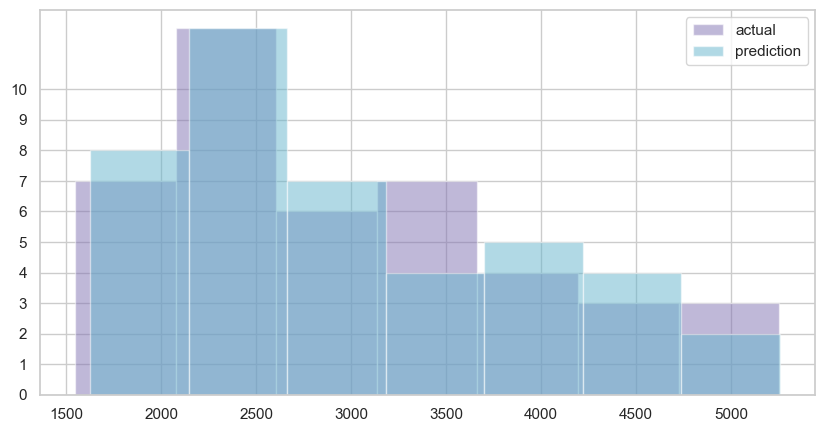

In [53]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)
_, ax = plt.subplots()
ax.hist(data.Sales, color='m', alpha=0.5, label='actual', bins=7)
ax.hist(pred, color='c',alpha=0.5, label='prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc='best')
plt.show()

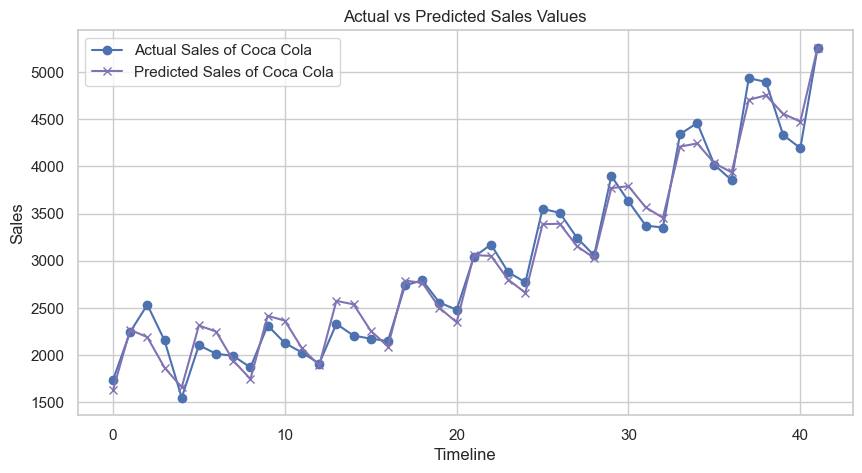

In [55]:
plt.plot(data.Sales, color='b', marker='o', label='Actual Sales of Coca Cola')
plt.plot(pred, color='m', marker='x', label='Predicted Sales of Coca Cola')

plt.title("Actual vs Predicted Sales Values")
plt.xlabel('Timeline')
plt.ylabel('Sales')
plt.legend()
plt.rcParams['figure.figsize'] = (10,5)
plt.show()